# GeoSpatial Public Policy Analysis - PyCon 2020
#### A repository containing the materials for the tutorial Geospatial Public Policy Analysis with GeoPandas for PyCon 2020. To be delivered virtually.

<details>
    <summary><strong>Goal</strong></summary>
    The goal of this notebook is to process NCES IPEDS tabular data into an analytical file (subset) that will be used in another notebook to visualize education deserts. 
    <ul>
        <li> Measurable goals for this notebook:</li>
        <li> 1. Identify <i>variables of interest</i> in dataset <strong>processed_data.csv</strong></li>
        <li> 2: Create a <i>working dataset</i> from dataset containing those variables of interest.</li>
    </ul>
</details>

<details>
    <summary><strong>Context</strong></summary>
    We've downloaded raw data from NCES IPEDS <a href="https://nces.ed.gov/ipeds/use-the-data/"><strong>https://nces.ed.gov/ipeds/use-the-data/</strong></a>. It has been pre-processed slightly for the purposes of this workshop. 
    <li>This notebook will create an analytical file to be used in the 01_Data_Visualization notebook.</li>
    <li>The pre-processed masterfile contains coordinates of higher education institutions as well as other institutional characteritics.</li>
    <li>The pre-processed mssterfile also contains graduation rate, demographic, and enrollment statistics.</li>
</details>

In [1]:
import pandas as pd
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
from pathlib import Path
from tools import tree
from datetime import datetime as dt
today = dt.today().strftime("%d-%b-%y")

today

'19-Apr-20'

In [2]:
RAW_DATA = Path("../data/raw/")
INTERIM_DATA = Path("../data/interim/")
PROCESSED_DATA = Path("../data/processed/")
FINAL_DATA = Path("../data/final/")
EXTERNAL_DATA = Path("../data/external/")

In [3]:
tree(PROCESSED_DATA)

+ ../data/processed
    + counties.csv
    + geodata
        + tl_2019_us_county.cpg
        + tl_2019_us_county.dbf
        + tl_2019_us_county.prj
        + tl_2019_us_county.shp
        + tl_2019_us_county.shp.ea.iso.xml
        + tl_2019_us_county.shp.iso.xml
        + tl_2019_us_county.shx
    + institutional_characteristics.csv
    + processed_data.csv


In [4]:
data = pd.read_csv(PROCESSED_DATA / 'institutional_characteristics.csv')

In [5]:
data.head()

,institution_name,longitude,latitude,fips_state_code,total_enrollment,full-time_enrollment,part-time_enrollment,control,level
0,Aaniiih Nakoda College,-108.757816,48.484196,Montana,150.0,108.0,42.0,Public,2-year
1,Abilene Christian University,-99.709797,32.468943,Texas,5204.0,3730.0,1474.0,Private not-for-profit,4-year or above
2,Abraham Baldwin Agricultural College,-83.528281,31.481889,Georgia,4291.0,2660.0,1631.0,Public,4-year or above
3,Abraham Lincoln University,-118.256726,34.146294,California,217.0,194.0,23.0,Private for-profit,4-year or above
4,Academy College,-93.299809,44.855722,Minnesota,99.0,81.0,18.0,Private for-profit,4-year or above


In [6]:
data['share_full-time'] = data['full-time_enrollment'] / data['total_enrollment']

In [7]:
institutions = gpd.GeoDataFrame(data, geometry = gpd.points_from_xy(data['longitude'], data['latitude']))

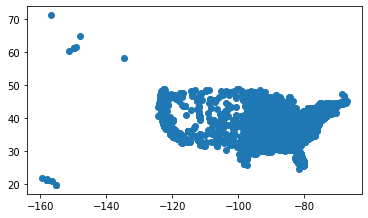

In [8]:
institutions.plot();

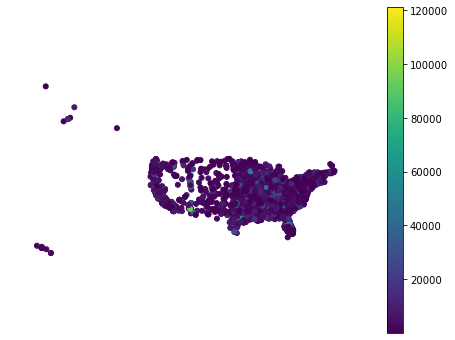

In [9]:
gplt.pointplot(institutions, hue='total_enrollment', legend=True)

In [10]:
counties = gpd.read_file(PROCESSED_DATA / 'geodata' / 'tl_2019_us_county.shp')

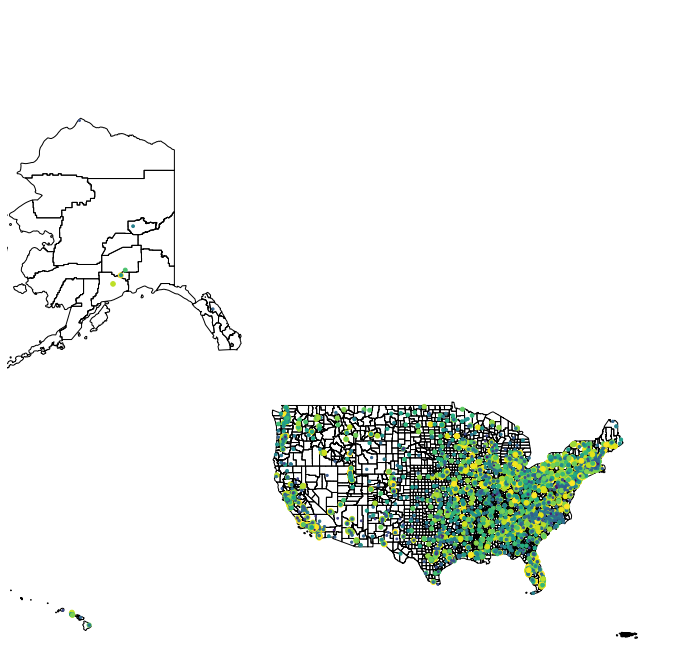

In [11]:
ax = gplt.polyplot(counties, projection=gcrs.WebMercator(), figsize=(12,12))
gplt.pointplot(institutions, hue='share_full-time', legend = False, ax=ax, scale='share_full-time')

We can focus on the contiguous states for now. For that we'll use the very simple but very handy package `us`.

In [12]:
import us

`us` comes with a lot of useful information.

You can lookup states even if you have typos in your data

In [13]:
us.states.lookup('califrnia')

<State:California>

or just their abbreviation

In [14]:
us.states.lookup("ca")

<State:California>

This is a `State` class that comes with a lot of information

In [15]:
california = us.states.lookup("cailfrnia")

In [16]:
california.statehood_year

1850

In [17]:
california.capital

'Sacramento'

In [18]:
california.fips

'06'

In [19]:
california.is_contiguous

True

Even official census shapefiles

In [20]:
california.shapefile_urls()

{'tract': 'https://www2.census.gov/geo/tiger/TIGER2010/TRACT/2010/tl_2010_06_tract10.zip',
 'cd': 'https://www2.census.gov/geo/tiger/TIGER2010/CD/111/tl_2010_06_cd111.zip',
 'county': 'https://www2.census.gov/geo/tiger/TIGER2010/COUNTY/2010/tl_2010_06_county10.zip',
 'state': 'https://www2.census.gov/geo/tiger/TIGER2010/STATE/2010/tl_2010_06_state10.zip',
 'zcta': 'https://www2.census.gov/geo/tiger/TIGER2010/ZCTA5/2010/tl_2010_06_zcta510.zip',
 'block': 'https://www2.census.gov/geo/tiger/TIGER2010/TABBLOCK/2010/tl_2010_06_tabblock10.zip',
 'blockgroup': 'https://www2.census.gov/geo/tiger/TIGER2010/BG/2010/tl_2010_06_bg10.zip'}

We will use it to filter out non-contiguous states.

In [21]:
us.STATES_CONTIGUOUS

[<State:Alabama>,
 <State:Arizona>,
 <State:Arkansas>,
 <State:California>,
 <State:Colorado>,
 <State:Connecticut>,
 <State:Delaware>,
 <State:District of Columbia>,
 <State:Florida>,
 <State:Georgia>,
 <State:Idaho>,
 <State:Illinois>,
 <State:Indiana>,
 <State:Iowa>,
 <State:Kansas>,
 <State:Kentucky>,
 <State:Louisiana>,
 <State:Maine>,
 <State:Maryland>,
 <State:Massachusetts>,
 <State:Michigan>,
 <State:Minnesota>,
 <State:Mississippi>,
 <State:Missouri>,
 <State:Montana>,
 <State:Nebraska>,
 <State:Nevada>,
 <State:New Hampshire>,
 <State:New Jersey>,
 <State:New Mexico>,
 <State:New York>,
 <State:North Carolina>,
 <State:North Dakota>,
 <State:Ohio>,
 <State:Oklahoma>,
 <State:Oregon>,
 <State:Pennsylvania>,
 <State:Rhode Island>,
 <State:South Carolina>,
 <State:South Dakota>,
 <State:Tennessee>,
 <State:Texas>,
 <State:Utah>,
 <State:Vermont>,
 <State:Virginia>,
 <State:Washington>,
 <State:West Virginia>,
 <State:Wisconsin>,
 <State:Wyoming>]

In [22]:
contiguous_fips = [state.fips for state in us.STATES_CONTIGUOUS]

In [23]:
mask_is_contiguous_counties = counties['STATEFP'].isin(contiguous_fips)

In [24]:
contiguous_counties = counties[mask_is_contiguous_counties].copy()

In [28]:
contiguous_counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477652222,10690952,+41.9158651,-096.7885168,"POLYGON ((-97.01952 42.00410, -97.01952 42.004..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680962890,61582307,+46.2946377,-123.4244583,"POLYGON ((-123.43639 46.23820, -123.44759 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016819475,29089486,+34.3592729,-104.3686961,"POLYGON ((-104.56739 33.99757, -104.56772 33.9..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169270569,22849484,+40.7835474,-096.6886584,"POLYGON ((-96.91075 40.78494, -96.91075 40.790..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645188,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27367 40.08940, -98.27367 40.089..."


we'll need to filter out the institutions in those counties as well.

There's two ways of doing this because our institutions dataframe has the name of the state the institution is in. We can:
1. Use this column directly, like we did just now using each state FIPS code
2. Create a new column with the state's FIPS code and filter out using that

I'm going to do #2 just to illustrate another functionality of `us` but you should try #1 too.

In [25]:
institutions.head()

,institution_name,longitude,latitude,fips_state_code,total_enrollment,full-time_enrollment,part-time_enrollment,control,level,share_full-time,geometry
0,Aaniiih Nakoda College,-108.757816,48.484196,Montana,150.0,108.0,42.0,Public,2-year,0.720000,POINT (-108.75782 48.48420)
1,Abilene Christian University,-99.709797,32.468943,Texas,5204.0,3730.0,1474.0,Private not-for-profit,4-year or above,0.716756,POINT (-99.70980 32.46894)
2,Abraham Baldwin Agricultural College,-83.528281,31.481889,Georgia,4291.0,2660.0,1631.0,Public,4-year or above,0.619902,POINT (-83.52828 31.48189)
3,Abraham Lincoln University,-118.256726,34.146294,California,217.0,194.0,23.0,Private for-profit,4-year or above,0.894009,POINT (-118.25673 34.14629)
4,Academy College,-93.299809,44.855722,Minnesota,99.0,81.0,18.0,Private for-profit,4-year or above,0.818182,POINT (-93.29981 44.85572)


In [26]:
institutions['FIPS'] = institutions['fips_state_code'].map(us.states.mapping("name", "fips"))

In [27]:
institutions.head()

,institution_name,longitude,latitude,fips_state_code,total_enrollment,full-time_enrollment,part-time_enrollment,control,level,share_full-time,geometry,FIPS
0,Aaniiih Nakoda College,-108.757816,48.484196,Montana,150.0,108.0,42.0,Public,2-year,0.720000,POINT (-108.75782 48.48420),30
1,Abilene Christian University,-99.709797,32.468943,Texas,5204.0,3730.0,1474.0,Private not-for-profit,4-year or above,0.716756,POINT (-99.70980 32.46894),48
2,Abraham Baldwin Agricultural College,-83.528281,31.481889,Georgia,4291.0,2660.0,1631.0,Public,4-year or above,0.619902,POINT (-83.52828 31.48189),13
3,Abraham Lincoln University,-118.256726,34.146294,California,217.0,194.0,23.0,Private for-profit,4-year or above,0.894009,POINT (-118.25673 34.14629),06
4,Academy College,-93.299809,44.855722,Minnesota,99.0,81.0,18.0,Private for-profit,4-year or above,0.818182,POINT (-93.29981 44.85572),27


In [30]:
mask_is_contiguous_institutions = institutions['FIPS'].isin(contiguous_fips)

In [31]:
contiguous_institutions = institutions[mask_is_contiguous_institutions].copy()

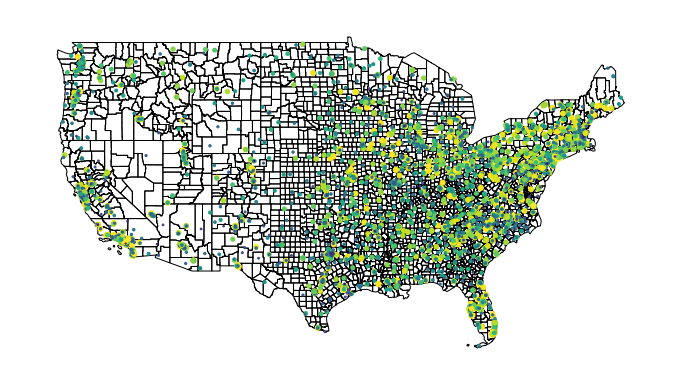

In [32]:
ax = gplt.polyplot(contiguous_counties, projection=gcrs.WebMercator(), figsize=(12,12), )
gplt.pointplot(contiguous_institutions, hue='share_full-time', legend = False, ax=ax, scale='share_full-time')

In [33]:
contiguous_counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477652222,10690952,+41.9158651,-096.7885168,"POLYGON ((-97.01952 42.00410, -97.01952 42.004..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680962890,61582307,+46.2946377,-123.4244583,"POLYGON ((-123.43639 46.23820, -123.44759 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016819475,29089486,+34.3592729,-104.3686961,"POLYGON ((-104.56739 33.99757, -104.56772 33.9..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169270569,22849484,+40.7835474,-096.6886584,"POLYGON ((-96.91075 40.78494, -96.91075 40.790..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645188,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27367 40.08940, -98.27367 40.089..."


In [34]:
county_data = pd.read_csv(PROCESSED_DATA / 'counties.csv')

In [35]:
county_data.head()

,geoid,name,universe,white_alone,black_alone,american_indian_and_alaska_native,asian_alone,native_hawaiian_and_pacific_islander,other_alone,two_or_more_races,latino_alone,state,county,asians_all,other_all
0,1001,"Autauga County, Alabama",55200.0,41412.0,10475.0,159.0,568.0,5.0,41.0,1012.0,1528.0,1,1,573.0,1212.0
1,1003,"Baldwin County, Alabama",208107.0,172768.0,19529.0,1398.0,1668.0,9.0,410.0,2972.0,9353.0,1,3,1677.0,4780.0
2,1005,"Barbour County, Alabama",25782.0,11898.0,12199.0,63.0,85.0,1.0,86.0,344.0,1106.0,1,5,86.0,493.0
3,1007,"Bibb County, Alabama",22527.0,16801.0,4974.0,8.0,37.0,0.0,0.0,160.0,547.0,1,7,37.0,168.0
4,1009,"Blount County, Alabama",57645.0,50232.0,820.0,124.0,198.0,18.0,174.0,818.0,5261.0,1,9,216.0,1116.0


In [36]:
county_data['geoid'] = county_data['geoid'].astype("str").str.zfill(5)

In [37]:
county_data = county_data.set_index("geoid")

In [38]:
contiguous_counties = contiguous_counties.set_index("GEOID")

In [39]:
working_df = contiguous_counties.join(county_data, )

In [40]:
working_df.sample(5).T

GEOID,04025,27011,34011,17165,17109
STATEFP,04,27,34,17,17
COUNTYFP,025,011,011,165,109
COUNTYNS,00042809,00659451,00882275,00424283,01784729
NAME,Yavapai,Big Stone,Cumberland,Saline,McDonough
NAMELSAD,Yavapai County,Big Stone County,Cumberland County,Saline County,McDonough County
LSAD,06,06,06,06,06
CLASSFP,H1,H1,H1,H1,H1
MTFCC,G4020,G4020,G4020,G4020,G4020
CSAFP,None,None,428,None,None
CBSAFP,39150,None,47220,None,31380


In [41]:
working_df['share_white'] = working_df['white_alone'] / working_df['universe']
working_df['share_black'] = working_df['black_alone'] / working_df['universe']
working_df['share_latino'] = working_df['latino_alone'] / working_df['universe']
working_df['share_asian'] = working_df['asian_alone'] / working_df['universe']

In [42]:
import mapclassify as mc

http://www.geog.ucsb.edu/~kclarke/Geography183/Lecture06.pdf

In [43]:
k = 7 
scheme_quantiles = mc.Quantiles(working_df['universe'], k=k)
scheme_fisherjenk = mc.FisherJenks(working_df['universe'], k=k)
scheme_fisherjenksampled = mc.FisherJenksSampled(working_df['universe'].values, k=k)

In [44]:
scheme_quantiles

Quantiles                         

         Interval            Count
----------------------------------
[     102.00,     6912.57] |   444
(    6912.57,    12948.00] |   444
(   12948.00,    20696.71] |   444
(   20696.71,    33592.57] |   444
(   33592.57,    56916.14] |   444
(   56916.14,   143127.71] |   444
(  143127.71, 10098052.00] |   444

In [45]:
scheme_fisherjenk

FisherJenks                       

         Interval            Count
----------------------------------
[     102.00,   138111.00] |  2651
(  138111.00,   469116.00] |   313
(  469116.00,   998684.00] |   100
(  998684.00,  1761382.00] |    26
( 1761382.00,  3302833.00] |    14
( 3302833.00,  5223719.00] |     3
( 5223719.00, 10098052.00] |     1

In [46]:
scheme_fisherjenksampled

FisherJenksSampled                

         Interval            Count
----------------------------------
[     102.00,    81441.00] |  2425
(   81441.00,   289564.00] |   450
(  289564.00,   538347.00] |   110
(  538347.00,  1046558.00] |    83
( 1046558.00,  2163257.00] |    29
( 2163257.00,  5223719.00] |    10
( 5223719.00, 10098052.00] |     1

In [47]:
legend_labels = [
    "< 76K",
    "76 - 225K",
    "225 - 450K",
    "450 - 930K",
    "930K - 1.49M",
    "1.49 - 2.38M",
    "2.38 - 10M"
]

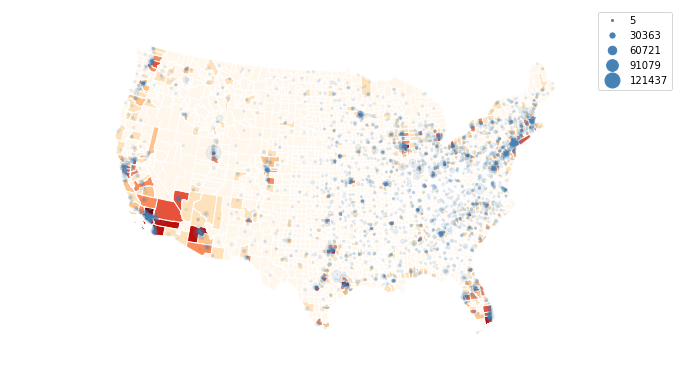

In [48]:
ax = gplt.choropleth(
    working_df, hue='universe', projection=gcrs.AlbersEqualArea(),
    edgecolor='white', linewidth=1,
    cmap='OrRd', legend=True, legend_kwargs={'loc': 'lower left'},
    scheme=scheme_fisherjenksampled,
    figsize=(12,12),
    legend_labels=legend_labels
)

gplt.pointplot(
    contiguous_institutions, 
#     hue='share_full-time', 
    legend = True, 
    ax=ax, 
    scale='total_enrollment',
    limits = (2,15),
    legend_var = 'scale', 
    zorder = 3,
    alpha = .1,
)

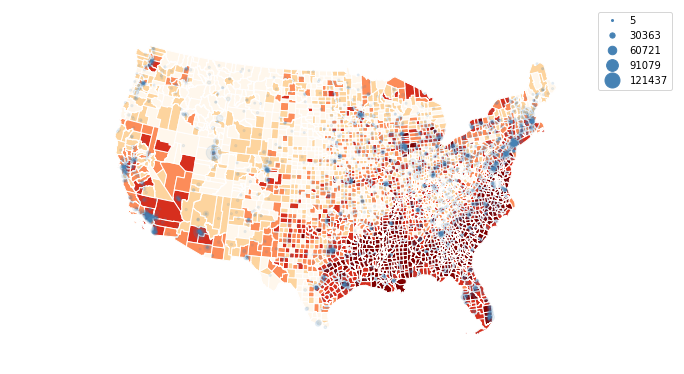

In [55]:
k = 5
voi = 'share_black'
scheme = mc.Quantiles(working_df[voi].values, k = k)

ax = gplt.choropleth(
    working_df, hue=voi, projection=gcrs.AlbersEqualArea(),
    edgecolor='white', linewidth=1,
    cmap='OrRd', legend=True, legend_kwargs={'loc': 'lower left'},
    scheme=scheme,
    figsize=(12,12),
#     legend_labels=legend_labels
)

gplt.pointplot(
    contiguous_institutions, 
#     hue='share_full-time', 
    legend = True, 
    ax=ax, 
    scale='total_enrollment',
    limits = (2,15),
    legend_var = 'scale', 
    zorder = 3,
    alpha = .1,
)

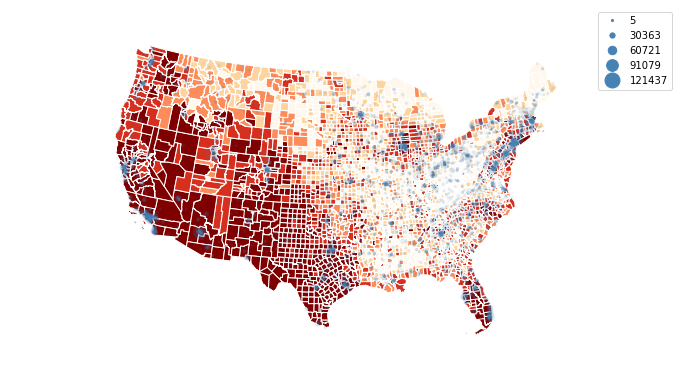

In [56]:
k = 5
voi = 'share_latino'
scheme = mc.Quantiles(working_df[voi].values, k = k)

ax = gplt.choropleth(
    working_df, hue=voi, projection=gcrs.AlbersEqualArea(),
    edgecolor='white', linewidth=1,
    cmap='OrRd', legend=True, legend_kwargs={'loc': 'lower left'},
    scheme=scheme,
    figsize=(12,12),
#     legend_labels=legend_labels
)

gplt.pointplot(
    contiguous_institutions, 
#     hue='share_full-time', 
    legend = True, 
    ax=ax, 
    scale='total_enrollment',
    limits = (2,15),
    legend_var = 'scale', 
    zorder = 3,
    alpha = .1,
)

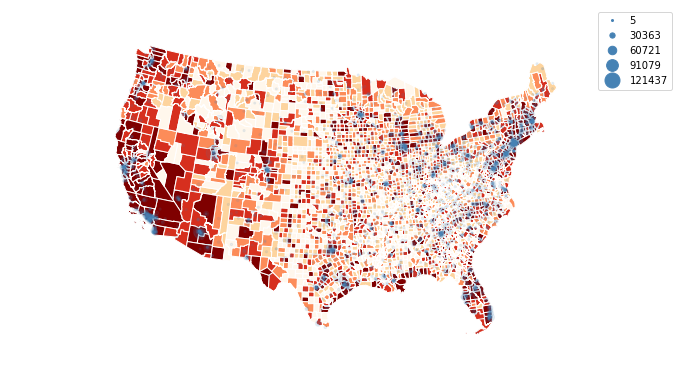

In [57]:
k = 5
voi = 'share_asian'
scheme = mc.Quantiles(working_df[voi].values, k = k)

ax = gplt.choropleth(
    working_df, hue=voi, projection=gcrs.AlbersEqualArea(),
    edgecolor='white', linewidth=1,
    cmap='OrRd', legend=True, legend_kwargs={'loc': 'lower left'},
    scheme=scheme,
    figsize=(12,12),
#     legend_labels=legend_labels
)

gplt.pointplot(
    contiguous_institutions, 
#     hue='share_full-time', 
    legend = True, 
    ax=ax, 
    scale='total_enrollment',
    limits = (2,15),
    legend_var = 'scale', 
    zorder = 3,
    alpha = .1,
)

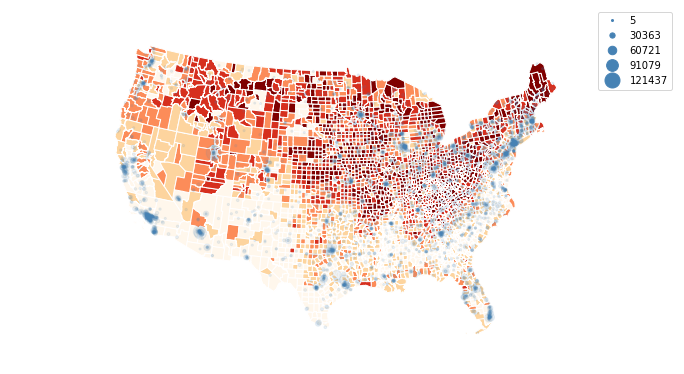

In [58]:
k = 5
voi = 'share_white'
scheme = mc.Quantiles(working_df[voi].values, k = k)

ax = gplt.choropleth(
    working_df, hue=voi, projection=gcrs.AlbersEqualArea(),
    edgecolor='white', linewidth=1,
    cmap='OrRd', legend=True, legend_kwargs={'loc': 'lower left'},
    scheme=scheme,
    figsize=(12,12),
#     legend_labels=legend_labels
)

gplt.pointplot(
    contiguous_institutions, 
#     hue='share_full-time', 
    legend = True, 
    ax=ax, 
    scale='total_enrollment',
    limits = (2,15),
    legend_var = 'scale', 
    zorder = 3,
    alpha = .1,
)